In [1]:
import sys
sys.path.append("../")

In [10]:
import os
import glob
import numpy as np
from src.utils import util
from src.networks import carson
from src.utils import plt_functions

# Cardiac Segmentation Network (CarSON)

In this notebook we demonstrate how to use CARSON as a stand-alone network. Define model and load trained weights. 

In [11]:
carson = carson.CarSON()

In [12]:
carson.initialize_model()

In [13]:
carson.model.load_weights('../trained_models/carson_Jan2021.h5')

### Run model on folder with the following structure: 

`nifti_directory`

`... subject_folder 1`

    ... image_1.nii.gz
    ... image_2.nii

`... subject_folder 2`

    ... image_1.nii
    
    
The niftis (3D/4D) are loaded and resampled to in-plane resolution of 1.25 mm. The images are then center-cropped to size 128x128, a step that assumes the heart will remain within the FOV (a valid assumption is most cases). AFter segmenting the images, the softmax output is saved as a nifti with the original format.  

In [14]:
nifti_directory = '../sample_data'

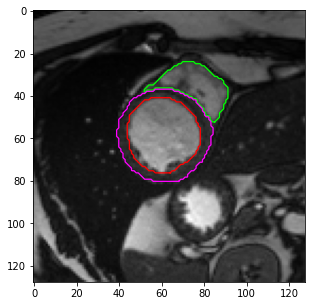

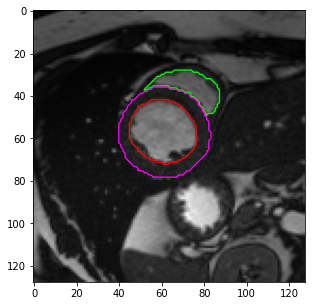

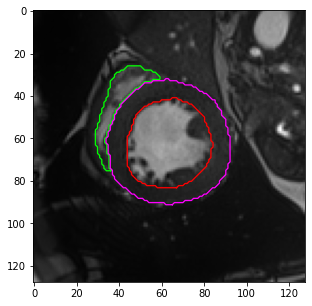

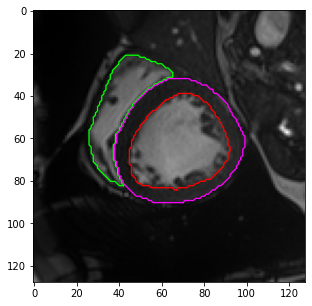

In [15]:
for subject_folder in glob.glob(os.path.join(nifti_directory, '*')):
    for subject_file in glob.glob(os.path.join(subject_folder, '*')):
        if '_segmentation' in os.path.basename(subject_file): continue
        x, x_nifti, x_nifti_resampled = util.load_from_file(subject_file)
        y = carson.model.predict(x)
        y_nifti, y_nifti_resampled = util.save_to_file_nifti(subject_file, y, x_nifti, x_nifti_resampled)
        plt_functions.Plot(image=x_nifti.get_fdata()[:,:,5], 
                           mask=np.argmax(y_nifti.get_fdata(), -1)[:,:,5], figsize=(5,5), crop=True)
        